In [6]:
import pandas as pd
import os
import numpy as np

### *복습.
- 지정된 폴더에 있는 파일들을 하나의 데이터프레임으로 결합
- 빈 데이터프레임 생성
- 반복문을 이용하여 리스트에 있는 csv 파일들을 하나씩 로드하여
- 빈 데이터프레임에 concat() 결합

In [16]:
files = os.listdir("../csv/2017")
df_2017 = pd.DataFrame()

for i in files:
    df_2017 = pd.concat([df_2017, pd.read_csv("../csv/2017/"+i)], axis=0, ignore_index=True)

In [20]:
len(df_2017)

70132

In [ ]:
"""파일안에 csv와 json이 섞여 있다면 아래처럼 필터링!"""
files = os.listdir("../csv/2021")

files = [file for file in files if file.endswith(".json")]
files

## Q.
- 1. 컬럼명 변경 - ["nid", "제목", "url", "부서레벨1", "부서레벨2", "부서레벨3", "부서레벨4", "부서레벨5", "집행년도", "집행월", "예산", "집행" ,"구분", "부서명", "집행일시" ,"집행장소", "집행목적", "대상인원", "결제방법", "집행금액"]
- 2. 컬럼 삭제 - ["부서레벨3", "부서레벨4", "부서레벨5", "예산", "집행", "구분"]
- 3. 월별 집행금액의 합 시각화(바 그래프)
- 4. pivot_table을 사용하여 그룹화(연도, 월) 집행금액의 합계를 그래프 출력(바 그래프)

In [29]:
df_2017.columns = ["nid", "제목", "url", "부서레벨1", "부서레벨2", "부서레벨3", "부서레벨4", "부서레벨5", "집행년도", "집행월", "예산", "집행" ,"구분", "부서명", "집행일시" ,"집행장소", "집행목적", "대상인원", "결제방법", "집행금액"]

In [33]:
df_2017 = df_2017.drop(["부서레벨3", "부서레벨4", "부서레벨5", "예산", "집행", "구분"], axis=1)

In [40]:
y = df_2017.groupby("집행월").sum()["집행금액"]

In [41]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#인덱스 먼저 만들어주기
index = np.arange(len(y)) + 1
index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

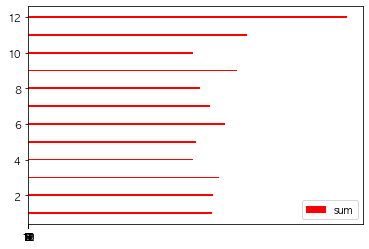

In [56]:
bar_width = 0.1

plt.barh(index, y, bar_width, color='r', label="sum")

#인덱스 대체
plt.xticks(index, y.index+1)
plt.legend()

plt.show()

In [62]:
# 4. pivot_table을 사용하여 그룹화(연도, 월) 집행금액의 합계를 그래프 출력(바 그래프)

month_total = pd.pivot_table(df_2017, index=["집행월"], columns=["집행년도"], values=["집행금액"], aggfunc='sum')
month_total

,집행금액
집행년도,2017
집행월,
1,710368860
2,712679864
3,737250454
4,635265805
5,647582378
6,758257342
7,701604626
8,661174850


<AxesSubplot:ylabel='집행월'>

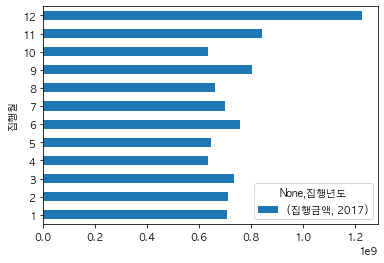

In [64]:
# total_df["집행일시"] = pd.to_datetime(total_df["집행일시"])
# total_df["집행월"] = total_df["집행일시"].dt.strftime("%m")

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

month_total.plot.barh()